# Data Exploration and General Overview Stats

In [1]:
%load_ext watermark
%watermark -a "Tom Wanger" -v -p numpy,matplotlib,seaborn

Tom Wanger 

CPython 3.6.4
IPython 6.2.1

numpy 1.14.0
matplotlib 2.1.2
seaborn 0.8.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

C:\Users\thochewa\Anaconda3\lib\site-packages\seaborn\apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


# Create Histogram

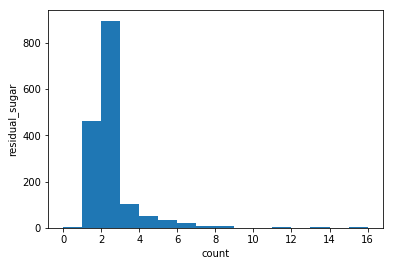

In [3]:
# read dataset
df = pd.read_csv('./DataToPlay/winequality-red.csv',
                 sep=';')
# create histogram
bin_edges = np.arange(0, df['residual_sugar'].max() + 1, 1)
fig = plt.hist(df['residual_sugar'], bins=bin_edges)

# add plot labels
plt.xlabel('count')
plt.ylabel('residual_sugar')
plt.show()

# Create a Scatterplot

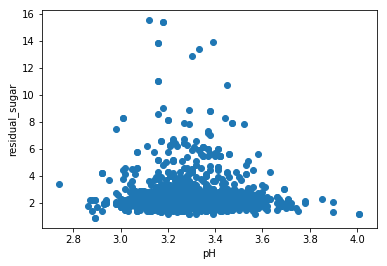

In [4]:
# create scatterplot
fig = plt.scatter(df['pH'], df['residual_sugar'])

# add plot labels
plt.xlabel('pH')
plt.ylabel('residual_sugar')
plt.show()

# Create Scatter Plot Matrix

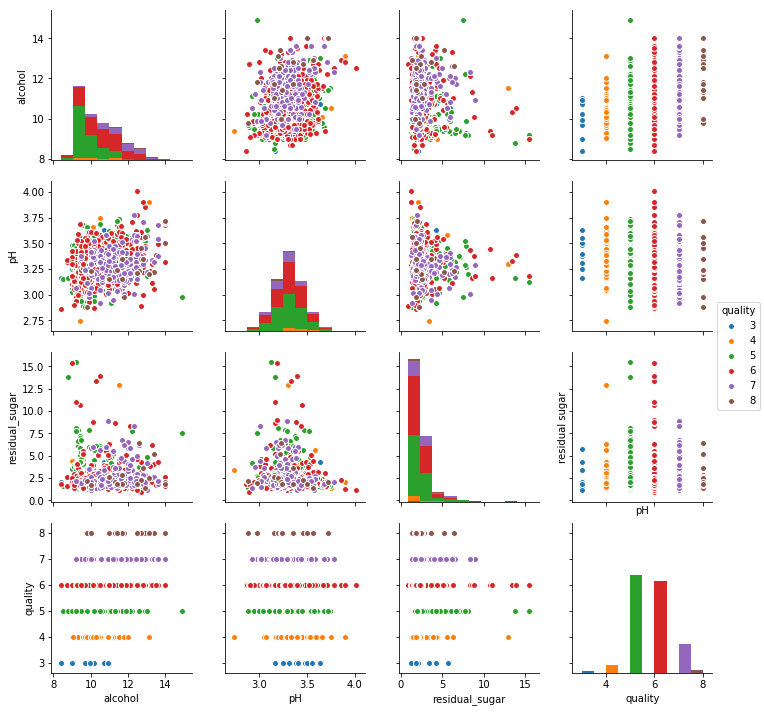

In [5]:
# create scatterplot matrix
fig = sns.pairplot(data=df[['alcohol', 'pH', 'residual_sugar', 'quality']], 
                   hue='quality')

# add plot labels
plt.xlabel('pH')
plt.ylabel('residual sugar')
plt.show()

In [6]:
# Columns header overview
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual_sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Empirical Cumulative Distribution Function Plot

92.18 percent have 4 or less units residual sugar


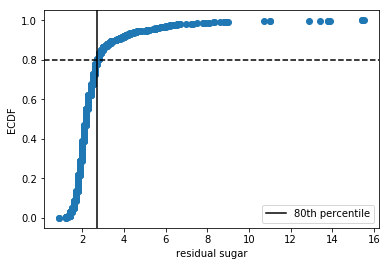

In [7]:
# sort and normalize data
x = np.sort(df['residual_sugar'])
y = np.arange(1, x.shape[0] + 1) / x.shape[0]

# create ecd fplot
plt.plot(x, y, marker='o', linestyle='')


# add plot labels
plt.ylabel('ECDF')
plt.xlabel('residual sugar')

percent_four_or_less = y[x <= 4].max()
print('%.2f percent have 4 or less units residual sugar' % 
      (percent_four_or_less*100))

eightieth_percentile = x[y <= 0.8].max()

plt.axhline(0.8, color='black', linestyle='--')
plt.axvline(eightieth_percentile, color='black', label='80th percentile')
plt.legend()
plt.show()

# Boxplots using matplotlib.pyplot.boxplot

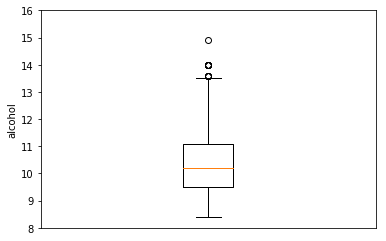

In [8]:
plt.boxplot(df['alcohol'])

plt.ylim([8, 16])
plt.ylabel('alcohol')

fig = plt.gca()
fig.axes.get_xaxis().set_ticks([])
plt.show()

# Summary stats based on numpy

In [9]:
x = df['fixed acidity'].values
x.dtype

dtype('float64')

## Mean

In [10]:
x_mean = np.mean(x)
x_mean

8.31963727329581

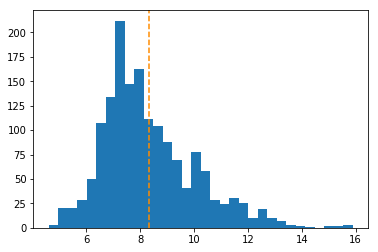

In [11]:
# histogram with mean

plt.hist(x, bins='auto')
plt.axvline(x_mean, color='darkorange', linestyle='--')
plt.show()

## sample variance & STD

In [12]:
var = np.var(x,ddof = 1) # the divisor used in the calculation is N - ddof // where N represents the number of elements
var1 = np.var(x)
print("var:", var)
print("var1:", var1)

stnd = np.std(x,ddof = 1)
stnd1 = np.std(x)
print("stnd:", stnd)
print("stnd1:", stnd1)

var: 3.0314163889978167
var1: 3.0295205688671114
stnd: 1.7410963181276953
stnd1: 1.7405518001102729


### Variance plot

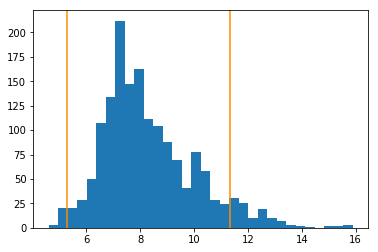

In [13]:
plt.hist(x, bins = 'auto')
plt.axvline(x_mean + var1, color='darkorange')
plt.axvline(x_mean - var1, color='darkorange')
plt.show()

### Standard deviation plot

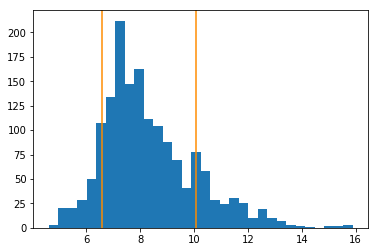

In [14]:
plt.hist(x, bins = 'auto')
plt.axvline(x_mean + stnd1, color='darkorange')
plt.axvline(x_mean - stnd1, color='darkorange')
plt.show()